In [1]:
import numpy as np
import pandas as pd

In [2]:
##import tensorflow as tf
##tf.logging.set_verbosity(tf.logging.ERROR)

import keras as ks
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
## Read in the entire data set just for eyeballing.
pd_data = pd.read_csv('K_data.csv', header=None)
np_data = np.array(pd_data.values, dtype=np.float32) ## float32 might be better if using a GPU
pd_data

,0,1,2,3,4,5
0,1.729100e-03,1.509,0.52360,3,2,0.0100
1,1.965300e-03,1.558,0.54105,3,2,0.0100
2,2.224300e-03,1.607,0.55851,3,2,0.0100
3,2.507300e-03,1.656,0.57596,3,2,0.0100
4,2.815600e-03,1.705,0.59341,3,2,0.0100
5,3.150700e-03,1.753,0.61087,3,2,0.0100
6,3.513700e-03,1.802,0.62832,3,2,0.0100
7,3.906100e-03,1.850,0.64577,3,2,0.0100
8,4.329200e-03,1.898,0.66323,3,2,0.0100
9,4.784300e-03,1.946,0.68068,3,2,0.0100


In [17]:
## Read in the training data, which includes both the input features and the outputs K.
pd_train = pd.read_csv('K_training_random_stand.csv', header=None)
np_train = np.array(pd_train.values, dtype=np.float32) ## float32 might be better if using a GPU
np_train

array([[2.6582001e-04, 9.4499999e-01, 9.3334609e-01, ..., 1.0000000e+00,
        1.0000000e+00, 2.0000000e-01],
       [6.9525000e-03, 2.1370001e+00, 2.1666348e-01, ..., 0.0000000e+00,
        1.0000000e+00, 5.0000000e-01],
       [5.4947002e-12, 1.1000000e-02, 0.0000000e+00, ..., 1.0000000e+00,
        9.0909094e-02, 6.0000002e-01],
       ...,
       [1.3298000e-10, 2.5000000e-02, 6.6663486e-01, ..., 1.0000000e+00,
        9.0909094e-02, 9.9179999e+02],
       [2.5088999e-16, 1.0000000e-03, 9.1663486e-01, ..., 1.0000000e+00,
        0.0000000e+00, 9.9600000e+02],
       [1.9636000e-06, 2.7700001e-01, 3.6666349e-01, ..., 0.0000000e+00,
        0.0000000e+00, 9.9640002e+02]], dtype=float32)

In [18]:
## Extract the input features: theta, m, n, h_star
features = np_train[:, 2:6]
features

array([[0.9333461 , 1.        , 1.        , 1.        ],
       [0.21666348, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 1.        , 0.09090909],
       ...,
       [0.66663486, 1.        , 1.        , 0.09090909],
       [0.91663486, 1.        , 1.        , 0.        ],
       [0.3666635 , 0.        , 0.        , 0.        ]], dtype=float32)

In [19]:
## Extract the correct outputs K
correct_outputs = np_train[:, 1]
correct_outputs[1:5]

array([2.137, 0.011, 0.03 , 0.022], dtype=float32)

In [20]:
## Read in the test data, which includes both the input features and the outputs K.
pd_test = pd.read_csv('K_testing_stand.csv', header=None)
np_test = pd_test.values
num_tests = len(np_test)

In [46]:
##  Define a model.
layer_0 = ks.layers.Dense(units=50, input_shape=[4])
layer_1 = ks.layers.Dense(units=1)
model_0 = ks.Sequential([layer_0, layer_1])
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                250       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 51        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_0.compile(loss='mean_squared_error',
              optimizer=ks.optimizers.Adam(0.1))

In [48]:
history_0 = model_0.fit(features, correct_outputs, epochs=250, verbose=True)
print("Finished training the model")

Epoch 1/250
540/540 [==============================] - 0s 328us/step - loss: 1.0150
Epoch 2/250
540/540 [==============================] - 0s 19us/step - loss: 0.3240
Epoch 3/250
540/540 [==============================] - 0s 21us/step - loss: 0.2270
Epoch 4/250
540/540 [==============================] - 0s 18us/step - loss: 0.1954
Epoch 5/250
540/540 [==============================] - 0s 19us/step - loss: 0.2210
Epoch 6/250
540/540 [==============================] - 0s 24us/step - loss: 0.2262
Epoch 7/250
540/540 [==============================] - 0s 21us/step - loss: 0.1970
Epoch 8/250
540/540 [==============================] - 0s 21us/step - loss: 0.2006
Epoch 9/250
540/540 [==============================] - 0s 20us/step - loss: 0.1985
Epoch 10/250
540/540 [==============================] - 0s 18us/step - loss: 0.2177
Epoch 11/250
540/540 [==============================] - 0s 20us/step - loss: 0.2272
Epoch 12/250
540/540 [==============================] - 0s 20us/step - loss: 0.2538


540/540 [==============================] - 0s 19us/step - loss: 0.2200
Epoch 99/250
540/540 [==============================] - 0s 19us/step - loss: 0.2435
Epoch 100/250
540/540 [==============================] - 0s 18us/step - loss: 0.2377
Epoch 101/250
540/540 [==============================] - 0s 19us/step - loss: 0.1943
Epoch 102/250
540/540 [==============================] - 0s 20us/step - loss: 0.2292
Epoch 103/250
540/540 [==============================] - 0s 18us/step - loss: 0.2174
Epoch 104/250
540/540 [==============================] - 0s 18us/step - loss: 0.2141
Epoch 105/250
540/540 [==============================] - 0s 17us/step - loss: 0.2070
Epoch 106/250
540/540 [==============================] - 0s 18us/step - loss: 0.2164
Epoch 107/250
540/540 [==============================] - 0s 19us/step - loss: 0.1979
Epoch 108/250
540/540 [==============================] - 0s 18us/step - loss: 0.2014
Epoch 109/250
540/540 [==============================] - 0s 18us/step - loss: 0.

540/540 [==============================] - 0s 18us/step - loss: 0.2081
Epoch 195/250
540/540 [==============================] - 0s 18us/step - loss: 0.2065
Epoch 196/250
540/540 [==============================] - 0s 18us/step - loss: 0.1858
Epoch 197/250
540/540 [==============================] - 0s 18us/step - loss: 0.1936
Epoch 198/250
540/540 [==============================] - 0s 20us/step - loss: 0.1940
Epoch 199/250
540/540 [==============================] - 0s 17us/step - loss: 0.1977
Epoch 200/250
540/540 [==============================] - 0s 18us/step - loss: 0.1893
Epoch 201/250
540/540 [==============================] - 0s 17us/step - loss: 0.2074
Epoch 202/250
540/540 [==============================] - 0s 19us/step - loss: 0.2227
Epoch 203/250
540/540 [==============================] - 0s 18us/step - loss: 0.2080
Epoch 204/250
540/540 [==============================] - 0s 17us/step - loss: 0.2030
Epoch 205/250
540/540 [==============================] - 0s 18us/step - loss: 0

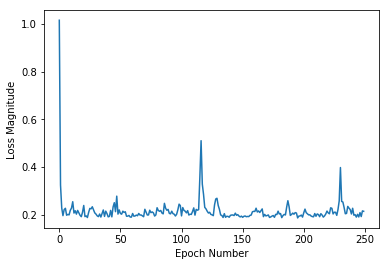

In [49]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_0.history['loss'])

In [50]:
## Run the test examples through the model.
errors = outputs = 0
for i in range(num_tests):
    test = np_test[i, 2:6]
    prediction = model_0.predict(np.array([test]))
    out = np_test[i, 1]
    
    print("Prediction: {}, Expected: {}".format(prediction[0][0], out))
    errors += abs(prediction - out)
    outputs += abs(out)
    
errors = errors[0][0]  ## Extract out the single real number.
print('')
print('Mean error on test set: {}'.format(errors / num_tests))
print('Mean error % on test set: {}'.format(errors / outputs * 100))

Prediction: 1.7530843019485474, Expected: 1.5090000000000001
Prediction: 1.4044439792633057, Expected: 1.915
Prediction: 1.2113474607467651, Expected: 0.9540000000000001
Prediction: 0.4708777070045471, Expected: 0.547
Prediction: 0.13193756341934204, Expected: 0.214
Prediction: -0.061158835887908936, Expected: 0.031
Prediction: 0.35039904713630676, Expected: 0.179
Prediction: 0.011430978775024414, Expected: 0.022000000000000002
Prediction: -0.23002803325653076, Expected: 0.001

Mean error on test set: 0.18614749113718668
Mean error % on test set: 31.186288537503348
